In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=584573ab779c97aae3e02646d722581a


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | maniitsoq
Processing Record 3 of Set 1 | qurayyat
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | barbar
City not found. Skipping...
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | tire
Processing Record 11 of Set 1 | luganville
Processing Record 12 of Set 1 | taoudenni
Processing Record 13 of Set 1 | comoapan
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | allanmyo
City not found. Skipping...
Processing Record 17 of Set 1 | harnosand
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | tomell

Processing Record 40 of Set 4 | mocuba
Processing Record 41 of Set 4 | chifeng
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | salinopolis
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | narva-joesuu
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | truro
Processing Record 49 of Set 4 | saskylakh
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | nisia floresta
Processing Record 2 of Set 5 | toora-khem
Processing Record 3 of Set 5 | byron bay
Processing Record 4 of Set 5 | rotifunk
Processing Record 5 of Set 5 | hiroshima
Processing Record 6 of Set 5 | saint anthony
Processing Record 7 of Set 5 | pimentel
Processing Record 8 of Set 5 | gao
Processing Record 9 of Set 5 | lipin bor
Processing Record 10 of Set 5 | urumqi
Processing Record 11 of Set 5 | cairns
Processing Record 12 of Set 5 | albany
Processing Record 13 of Set 5 | kununurra
Processing Recor

Processing Record 30 of Set 8 | mastung
Processing Record 31 of Set 8 | barrhead
Processing Record 32 of Set 8 | la paz
Processing Record 33 of Set 8 | yulara
Processing Record 34 of Set 8 | karoi
Processing Record 35 of Set 8 | kandrian
Processing Record 36 of Set 8 | tupik
Processing Record 37 of Set 8 | new plymouth
Processing Record 38 of Set 8 | faridan
City not found. Skipping...
Processing Record 39 of Set 8 | kalaleh
Processing Record 40 of Set 8 | roald
Processing Record 41 of Set 8 | grand baie
Processing Record 42 of Set 8 | mitsamiouli
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | dubai
Processing Record 45 of Set 8 | mouzakion
City not found. Skipping...
Processing Record 46 of Set 8 | palpa
Processing Record 47 of Set 8 | yerbogachen
Processing Record 48 of Set 8 | zhelyabovka
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set 8 | biltine
Processing Record 1 of Set 9 | souillac
Processing Record 2 of Set 9 | scarborough
Process

Processing Record 21 of Set 12 | yabelo
Processing Record 22 of Set 12 | klyuchi
Processing Record 23 of Set 12 | ozgon
City not found. Skipping...
Processing Record 24 of Set 12 | esil
Processing Record 25 of Set 12 | najran
Processing Record 26 of Set 12 | dawson creek
Processing Record 27 of Set 12 | buin
Processing Record 28 of Set 12 | dawlatabad
Processing Record 29 of Set 12 | rio gallegos
Processing Record 30 of Set 12 | hamina
Processing Record 31 of Set 12 | arkhangelsk
Processing Record 32 of Set 12 | sabya
Processing Record 33 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 34 of Set 12 | tidore
City not found. Skipping...
Processing Record 35 of Set 12 | ulcinj
Processing Record 36 of Set 12 | warqla
City not found. Skipping...
Processing Record 37 of Set 12 | nabire
Processing Record 38 of Set 12 | atasu
Processing Record 39 of Set 12 | tuatapere
Processing Record 40 of Set 12 | la rioja
Processing Record 41 of Set 12 | mansa
Processing Record 42 of Set 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,24.48,87,100,12.10,RU,2021-04-13 04:39:11
1,Maniitsoq,65.4167,-52.9000,28.90,74,78,8.39,GL,2021-04-13 04:39:12
2,Qurayyat,31.3318,37.3428,44.60,76,0,6.24,SA,2021-04-13 04:39:12
3,Ushuaia,-54.8000,-68.3000,48.20,46,40,24.16,AR,2021-04-13 04:39:12
4,Kavieng,-2.5744,150.7967,82.40,60,100,13.80,PG,2021-04-13 04:39:13
5,Cherskiy,68.7500,161.3000,1.80,77,24,2.21,RU,2021-04-13 04:39:13
6,Tuktoyaktuk,69.4541,-133.0374,12.20,73,75,12.66,CA,2021-04-13 04:39:13
7,Tire,38.0888,27.7351,42.80,87,15,6.91,TR,2021-04-13 04:39:14
8,Luganville,-15.5333,167.1667,83.79,74,100,7.45,VU,2021-04-13 04:39:14
9,Taoudenni,22.6783,-3.9836,84.27,13,0,6.02,ML,2021-04-13 04:29:18


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2021-04-13 04:39:11,71.9667,102.5000,24.48,87,100,12.10
1,Maniitsoq,GL,2021-04-13 04:39:12,65.4167,-52.9000,28.90,74,78,8.39
2,Qurayyat,SA,2021-04-13 04:39:12,31.3318,37.3428,44.60,76,0,6.24
3,Ushuaia,AR,2021-04-13 04:39:12,-54.8000,-68.3000,48.20,46,40,24.16
4,Kavieng,PG,2021-04-13 04:39:13,-2.5744,150.7967,82.40,60,100,13.80
5,Cherskiy,RU,2021-04-13 04:39:13,68.7500,161.3000,1.80,77,24,2.21
6,Tuktoyaktuk,CA,2021-04-13 04:39:13,69.4541,-133.0374,12.20,73,75,12.66
7,Tire,TR,2021-04-13 04:39:14,38.0888,27.7351,42.80,87,15,6.91
8,Luganville,VU,2021-04-13 04:39:14,-15.5333,167.1667,83.79,74,100,7.45
9,Taoudenni,ML,2021-04-13 04:29:18,22.6783,-3.9836,84.27,13,0,6.02


In [17]:
# Create the output file (CSV).
output_data_file = "C:/Users/johns/World_Weather_Analysis/weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1618290677.0553203

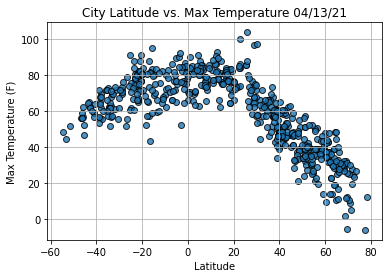

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

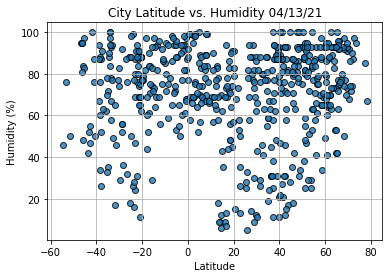

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

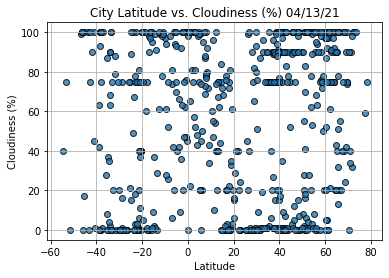

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

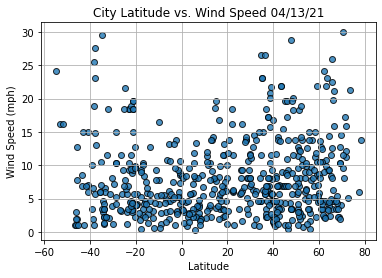

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()